In [1]:
# import basics
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# import pyathena 
import sys
sys.path.insert(0,'../../')
import pyathena as pa

# Cooling in TIGRESS-classic

See Figure 1 in {cite:t}`2017ApJ...846..133K`

## Tabulated cooling/heating coefficients

- Original form is taken from Koyama & Inutsuka (2004; with typo correction in Kim et al. (2008)) at $T<10^{4.2}{\rm K}$ and Sutherland \& Dopita (1993) for $T>10^{4.2}{\rm K}$

- Volumetric cooling/heating rates are: $n_{\rm H}^2\Lambda(T)$ and $n_{\rm H}\Gamma$. $\Gamma$ is proportional to the `heat_ratio` field in the code (unity for the solar neighborhood condition)

- Pressure, mean molecular weight, temperature, electron abundance, etc.

  $$
  P = \dfrac{\rho k_{\rm B}T}{\mu m_{\rm H}} = \dfrac{\rho k_{\rm B}T_{\mu}}{m_{\rm H}}= \dfrac{n_{\rm H}k_{\rm B}T}{\mu_{\rm H}m_{\rm H}} \approx (n_{\rm H^0} + n_{\rm H^+} + n_{\rm H_2} + n_{\rm He} + n_{\rm e}) k_{\rm B}T \approx (1.1 + x_{\rm e} - x_{\rm H_2})n_{\rm H}k_{\rm B}T
  $$

  where $T_{\mu} \equiv T/\mu$, $x_{\rm e} = n_{\rm e}/n_{\rm H}$, and $x_{\rm H_2} = n_{\rm H_2}/n_{\rm H}$, and so on.

- The quantity $T_{\mu} \propto P/n_{\rm H}$ is easy to evolve in the cooling module.

- In the TIGRESS-classic cooling function,
  - $\mu_H = \rho/(n_{\rm H}m_{\rm H}) = 1.4271$
  - $x_{\rm H_2} = 0$.
  - $T$, $\Lambda(T)$, $\Gamma(T)$ are tabulated as functions of $T_\mu$ (or the `T1` field in the code)

In [2]:
cf = pa.classic.coolftn
c = cf.get_cool(cf.T1)
h = cf.get_heat(cf.T1)
T = cf.get_temp(cf.T1)

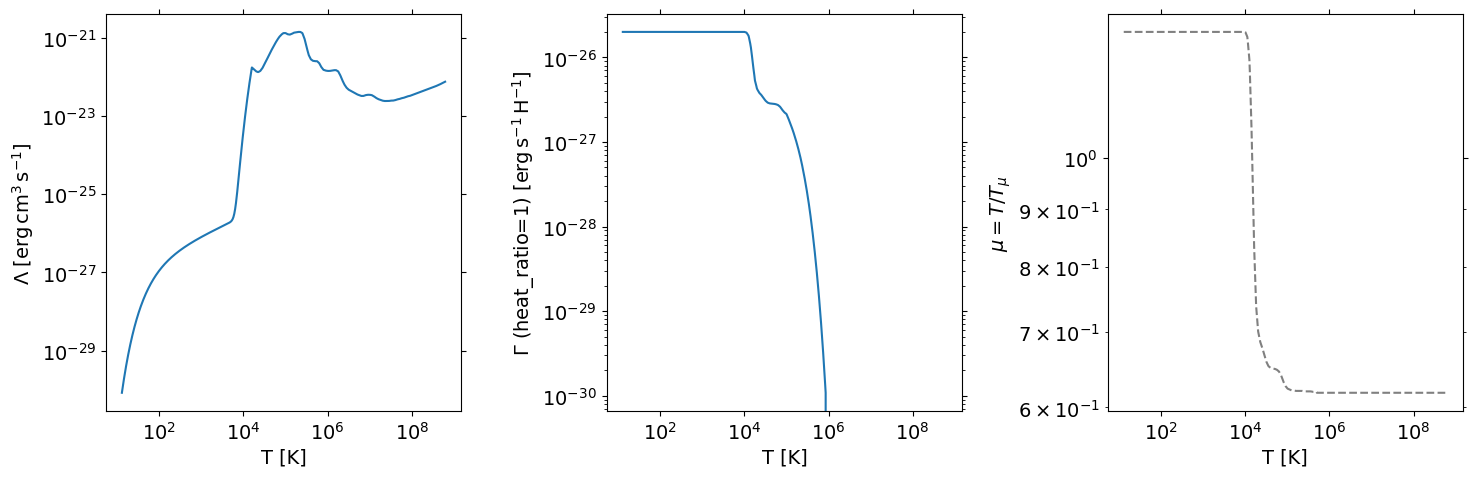

In [3]:
mpl.rcParams['font.size'] = 14
fig, axes = plt.subplots(1, 3, figsize=(15,5))
plt.sca(axes[0])
plt.loglog(T, c)
plt.xlabel('T [K]')
plt.ylabel(r'$\Lambda\;[{\rm erg}\,{\rm cm}^{3}\,{\rm s}^{-1}]$')

plt.sca(axes[1])
plt.loglog(T, h)
plt.xlabel('T [K]')
plt.ylabel(r'$\Gamma$ (heat_ratio=1) $[{\rm erg}\,{\rm s}^{-1}\,{\rm H}^{-1}]$')
plt.tight_layout()

plt.sca(axes[2])
plt.loglog(T, T/cf.T1, 'grey', ls='--')
plt.xlabel('T [K]')
plt.ylabel(r'$\mu = T/T_{\mu}$')
plt.tight_layout()

1.4271


Text(0.5, 1.0, 'Thermal Equilibrium for $\\Gamma=\\Gamma_0$')

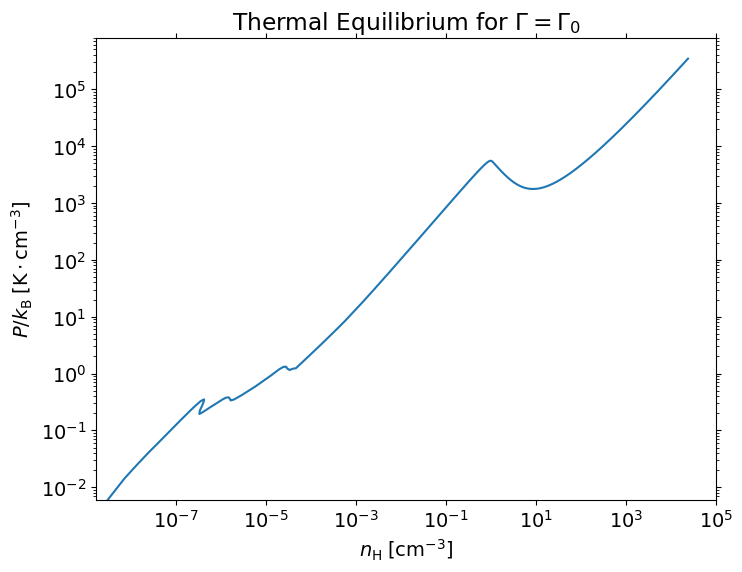

In [4]:
u = pa.Units()
print(u.muH)
nH_eq = h/c
# 1.1 + xe = u.muH/(temp/cf.T1)
pok_eq = nH_eq*u.muH*cf.T1
plt.loglog(nH_eq,pok_eq)
plt.xlabel(r'$n_{\rm H}\;[{\rm cm}^{-3}]$')
plt.ylabel(r'$P/k_{\rm B}\;[{\rm K}\cdot{\rm cm}^{-3}]$')
plt.title(r"Thermal Equilibrium for $\Gamma=\Gamma_0$")
# plt.xlim(1e-3,1e5)
# plt.ylim(1e1,1e6)

# Ion-by-ion CIE cooling function table from Gnat & Sternberg (2012)

[Text(0.5, 0, '$T\\;[{\\rm }]$'),
 Text(0, 0.5, '$\\Lambda_{\\rm Gnat+12}\\;[{\\rm erg}\\,{\\rm s}{^-1}]$')]

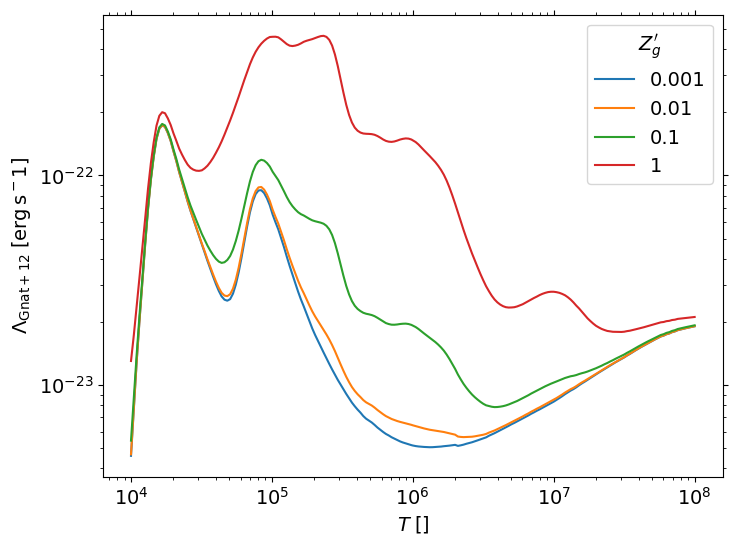

In [5]:
from pyathena.microphysics.cool_gnat12 import CoolGnat12

Zps = [1e-3, 1e-2, 1e-1, 1]
for Zp in Zps:
    cg = CoolGnat12(abundance='Asplund09', Zprime=Zp)
    cg.get_cool_cie_total()
    # For ion-by-ion cooling, see cg.cool
    plt.loglog(cg.temp, cg.cool_tot, label=f'{Zp}')
    
    # Save cooling tables
    #data = np.column_stack([cg.temp.values, cg.cool_tot])
    #np.savetxt(f'cooling_log10Zp{int(np.log10(Zp)):g}.csv', data,
    #           delimiter=',', header='T,Lambda', comments='')

plt.legend(title=r'$Z_g^{\prime}$')
plt.setp(plt.gca(), xlabel=r'$T\;[{\rm }]$', ylabel=r'$\Lambda_{\rm Gnat+12}\;[{\rm erg}\,{\rm s}{^-1}]$')